# Como evaluar la estacionariedad usando ACF
Implementación en ```Python```.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# creamos los datos
np.random.seed()
mu, sigma = 0, 20
N=1000

Z = np.random.normal(mu, sigma, N)

phi=0.3 # -0.7 si quiere ver oscilaciones
phi=-0.7
X=np.zeros(N)

X[0] = Z[0]

for t in range(1, N):
    X[t] = Z[t] + phi*X[t-1] + t 

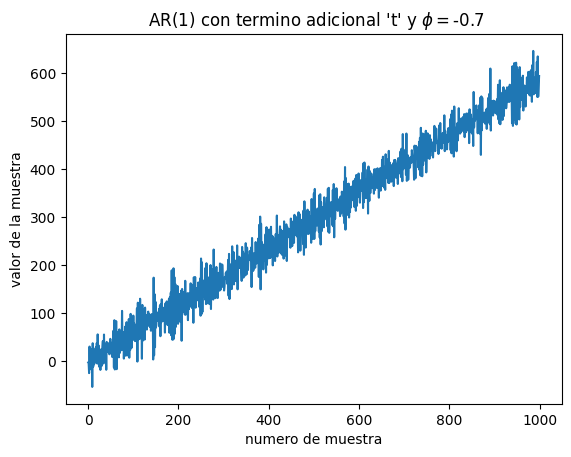

In [ ]:
# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f" AR(1) con termino adicional 't' y $\phi=${phi}")
plt.plot(X)

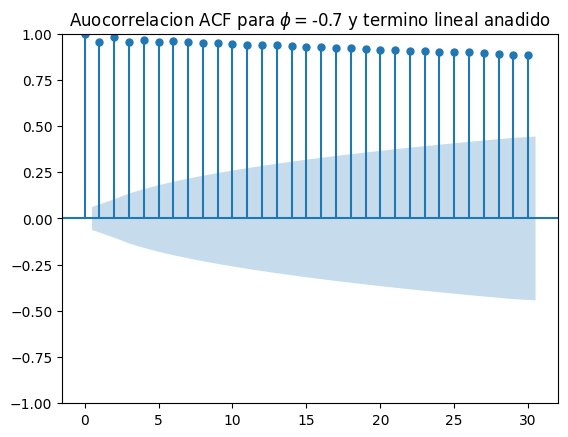

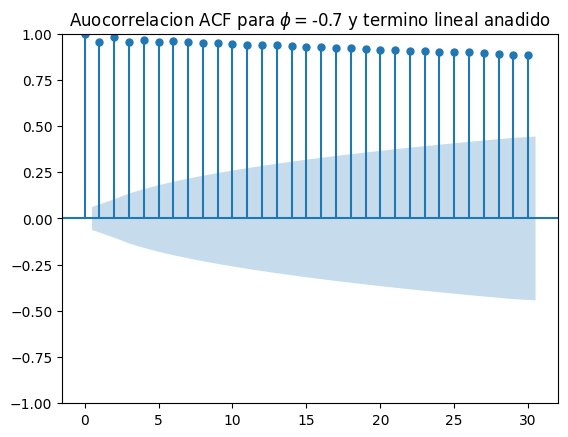

In [ ]:
# grafiquemos la autocorrelacion ACF
plot_acf(X, title=f"Auocorrelacion ACF para $\phi=${phi} y termino lineal anadido")

## como determinamos el orden de diferenciacion d.
Recuerden que el modelo es ARIMA(p,d,q).

Si luego de differenciar un numero d de veces (por prueba y errror) la ACF queda con colas , entonces d no es suficiente. Si los "lags" son 1 o 2 esta bien.
Puede pasar que si d is muy pequenho se puedean adicionar terminos al AR, es decir incrementar p,
de igual manear si d es muy grande se pueden incrementar terminos al MA, es decir aumentar q. 

ARIMA(p,d,q).

Hay una prueba para determinar estacionariedad llamada
la Dickey-Fullter Test



# The Dickey-Fuller Test
## The unit test.
Que es el "unit" test.   Esta prueba busca una raiz del polinomio caracteristico en el circulo unitario. es decir
$| r | = 1$. Por que esta raiz? por que esta raiz produce
datos que no son estacionarios. El sistema no es estable y los datos crecen sin cota.

Veamos el ejemplo de un AR(1).

$$ X_t = \phi X_{t-1} = Z_t .$$, con drift $c=0$.
El polinomio caracteristico aca es:

$$p(B) = 1 - \phi B. $$
La raiz del polinmio caracteristico es $r=1/\phi$. 
Que pasa si $\phi=1$? En esta caso la raiz es $r=1$.
Por esto se llama unit root test. Recuerden las condiciones de estabilidad al principio del curso, para que sistema sea estable $|\phi| < 1$. El caso $|\phi|=1$
produce un infinito en la media y varianza de este modelo,, el cual divide por $\phi-1$. 

El modelo con $\phi=1$ es muy famoso. Se llama
**random walk**.  Existen varios modelos con esta descripcion.

* Stock market behavior
* Brownian motion,
* displacement of a drunk man.

El modelo con  $\phi=1$ es.

$$X_t = X_{t-1} + Z_t.$$
O pasando a restar

$$X_t - X_{t-1} = Z_t.$$

Es claro en lo que acabamos de hacer que una diferencia de primer orden remueve la no estacionariedad y lo convierte en ruido blanco, 

$$Y_t = \Delta Z_t = Z_t. $$

Hagamos la prueba numerica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# creamos los datos
np.random.seed()
mu, sigma = 0, 20
N=1000

Z = np.random.normal(mu, sigma, N)

import matplotlib as mpl
mpl.rc('lines', linewidth=0.5)

phi=0.3 # -0.7 si quiere ver oscilaciones
phi=1.0
X=np.zeros(N)

X[0] = Z[0]

for t in range(1, N):
    X[t] = Z[t] + phi*X[t-1]

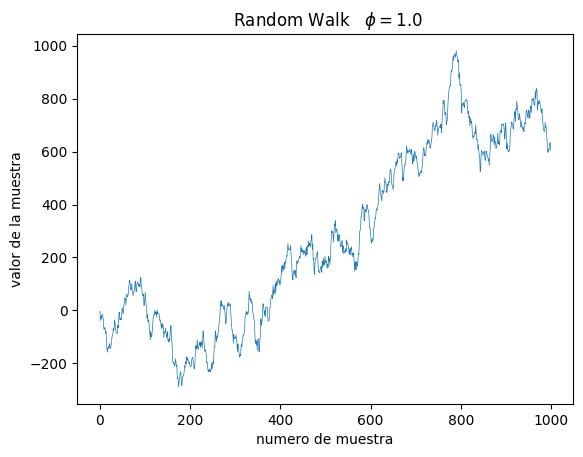

In [ ]:
# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f" Random Walk   $\phi=${phi}")
plt.plot(X)

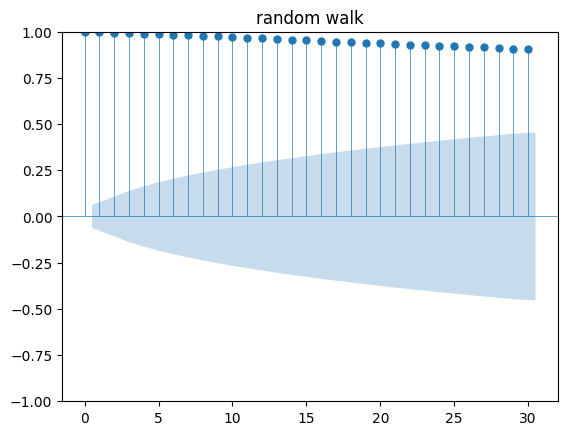

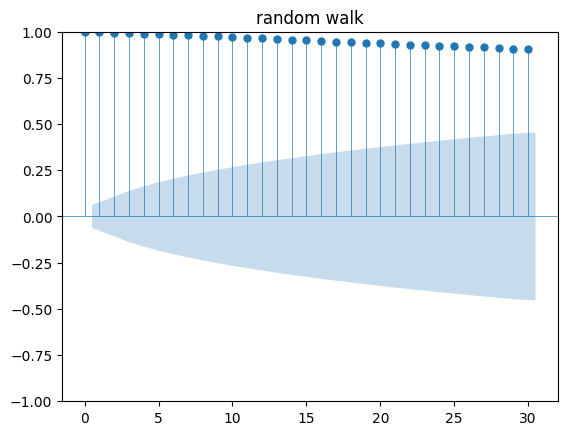

In [ ]:
# grafiquemos el ACF
plot_acf(X, title='random walk')

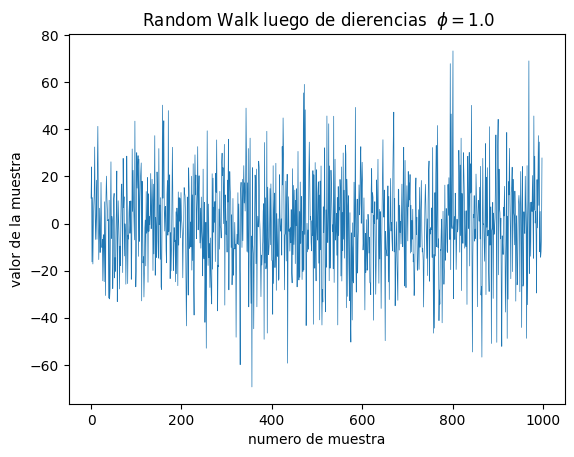

In [ ]:
# tomemos diferencias.
# con una sola instruccion podemos hacer diferencias

Y = X[:-1] - X[1:]  # primeras diferencias X_t - X_{t-1}
# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f" Random Walk luego de dierencias  $\phi=${phi}")
plt.plot(Y)


In [ ]:
# Y[:]-Z[:-1] pienso mas o lo dejo de ejercicio. Por que no son 0

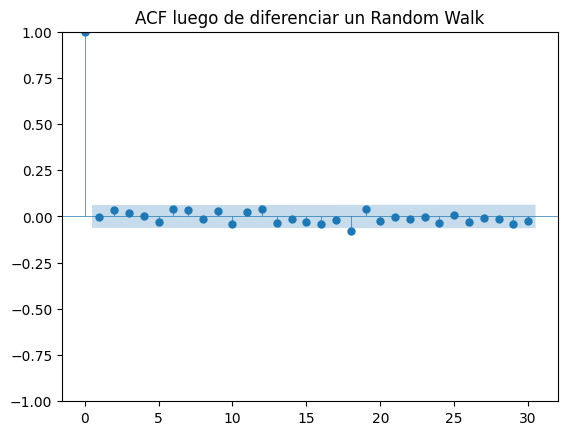

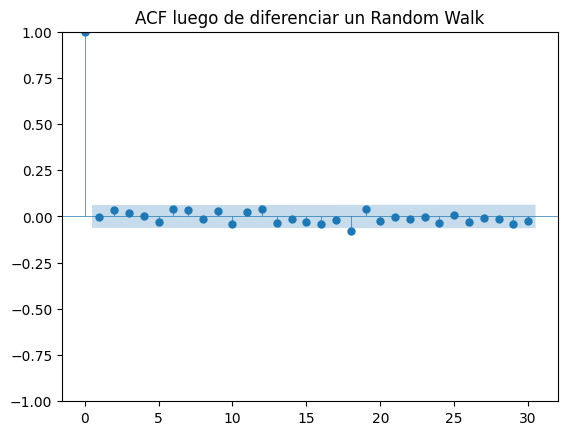

In [ ]:
# grafiquemos el ACF, es decir, es verificar que es ruido blanco.
plot_acf(Y, title="ACF luego de diferenciar un Random Walk")

# Retomemos el Dickey-Fuller test.

Asumamos un modelo AR(1),

$$ X_t = \phi X_{t-1} + Z_t + c .$$

La idea de Dickey-Fuller es construir dos hipotesis:

* H0 : $\phi=1$ y el proceso no es estacionario (tiene un "unit root")
* H1 : $\phi<1$ en cuyo caso el modelo es estacionario.

Equivalentemente  podemos restar $X_{t-1}$ a ambos lados y tener


$$ Y= \Delta X_t = X_t - X_{t-1} = (\phi-1)X_{t-1} + Z_t = \delta X_{t-1} + Z_t .$$

Se podrian formar las siguintes dos hipotesis:

* H0 : $\delta=0$ y el proceso no es estacionario (tiene un "unit root"
* H1 : $\delta < 0 $ en cuyo caso el modelo es estacionario.

Nota historica:
En su tesis doctoral David A. Dickey construyo una tabla empirica usando el metodo de Mone Carlo para verificar las hipotesis. Por que estas hipotesis no son verficables con el metodo Gaussiano por que no tiene este comportamiento. Wayne A. Fuller, 1996 muestra esta relacion empirica en la pagina 642 y el uso.

Veamos el uso de este metodo en la practica.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# creamos los datos
np.random.seed()
mu, sigma = 0, 20
N=1000

Z = np.random.normal(mu, sigma, N)

import matplotlib as mpl
mpl.rc('lines', linewidth=0.5)

phi=0.3 # -0.7 si quiere ver oscilaciones
phi=1.0
X=np.zeros(N)

X[0] = Z[0]

for t in range(1, N):
    X[t] = Z[t] + phi*X[t-1]

In [ ]:
from statsmodels.tsa.stattools import adfuller
# help(adfuller)
result = adfuller(X)  # solo se necesitan los datos X
result

(-1.4025501216284455,
 0.5810529493653539,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 8633.803238634908)

In [ ]:
p = result[1]  # p-value

# set alpha to 0.05
alpha=0.05

# determinamos si la correlacion es significativa (H1) o no (H0)
if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there series is not stationary. Passed the hypothesis test H0")
else: 
    print("it did  pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("the series is stationary. It fails the hypothesis test")


it did not pass the null hypothesis test p=0.000000, alpha=0.050000
there series is not stationary. Passed the hypothesis test H0


In [ ]:
# hagamos las diferencias y probamos de nuevo
# tomemos diferencias.
# con una sola instruccion podemos hacer diferencias

Y = X[:-1] - X[1:]  # primeras diferencias X_t - X-{t-1}

In [ ]:
result = adfuller(Y)  # solo se necesitan los datos X
result


(-31.38017275682639,
 0.0,
 0,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 8627.782741539842)

In [ ]:
# determinamos si la correlacion es significativa (H1) o no (H0)
if p < alpha:
    print("it did not pass the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("there series is  stationary. Failed the hypothesis test H0")
else: 
    print("it did  passed the null hypothesis test p=%f, alpha=%f"%(p,alpha))
    print("the series is not stationary. ")


it did not pass the null hypothesis test p=0.000000, alpha=0.050000
there series is  stationary. Failed the hypothesis test H0


Que pasa en un modelo AR(p) con p>1.

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + Z_t + c.$$
Como hicimos antes tomamos la primera diferencia


$$Y_t = \Delta X_t =  X_t - X_{t-1} = (\phi_1 -1)X_t + \sum_{i=2}^p \phi_i X_{t-i} + Z_t = \delta X_{t-1} + \sum_{i=2}^p \phi_i X_{t-i}  + Z_t .$$
Para el prolema **aumentado** Dickey-Fuller test postulamos las siguientes dos hipotesis:

* H0: $\delta = 0$. Es un proceso que no es estacionario
* H1: $\delta < 0$. Esto genera datos no estacionarios.

No hacemos ejercicios practicos de esto. 

Con esto terminamos el curso.  Que queda pendiente.
Para un curso imaginario TIME SERIES II.

* Modelos SARIMA(p,d,q)(P,D,Q).
* Modelos SARIMAX(p,d,q)(P,D,Q).
* forecasting. 
* Frequency domain time series analysis.
* Machine Learning for time series analysis.
* Deep Learning for time series analysis. 